<h1 align="center"> 
Predicting the Cause of Wildfires 
</h1> 
<h2 align="center"> 
DATS 6501_10, Spring 2019, Capstone (Machine Learning)
</h2>

<h4 align="center"> 
Author: Jiajun Wu
</h4>

### Problem definition and motivation
We chosen to explore Spatial wildfire occurrence data for the United States, 1992-2015, which consists of 1,880,465 records and 39 attributes. We plan to use a data science approach to analyzing the wildfire data in order to predict the cause of wildfire, based on the variety of features in the database. Our motivation for this project is tov apply the machine learing models we have learned in class onto a real-world data set. 

### Proposed method, language, and package for implementation
The project aims to use Python to analyze the wildfire data. Specific packages to be used are Numpy, Pandas, and Scikit-learn. We will use Matplotlib for visualizations. For the methods the team plans to use to make our predictor, we’ll be trying neural net, and then two methods covered later in class: Random Forest and Support Vector Machine (SVM).

### Link to the data
https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/


#### Part 1: import libraries and data, convert dates to Gregorian format
#### Part 2: EDA
#### Part 3: Use machine learning to predict the cause of the fires
#### Part 4: Build a system that predicts if the fire was malicious



# 1.Load Data

### Load the Data
### Import libraries and data, convert dates to Gregorian format, encode

In [4]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import time 

sqlite_file = "FPA_FOD_20170508.sqlite"
conn=sqlite3.connect(sqlite_file)
c = conn.cursor()

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
fires = pd.read_sql_query("SELECT * FROM fires", conn)

In [7]:
# fires.head()

In [8]:
# fires.shape
# (1880465, 39)

In [9]:
# fires.columns.values.tolist()

In [10]:
# fires._stat_axis.values.tolist()

In [11]:
# Julian Date format to Gregorian dates
fires['DATE'] = pd.to_datetime(fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# print(fires['DATE'])

In [12]:
fires['MONTH'] = pd.DatetimeIndex(fires['DATE']).month
fires['WEEK_OF_DAY'] = fires['DATE'].dt.weekday_name

In [13]:
# fires.dtypes

In [14]:
df = fires[['STAT_CAUSE_DESCR','LATITUDE','LONGITUDE','FIRE_SIZE','DISCOVERY_DATE','MONTH','WEEK_OF_DAY','STATE']]
#df.head(10)

In [15]:
# df.shape
# (1880465, 8)

### Clean the Data

In [16]:
print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 1880465


In [17]:
fires.replace('?', np.NaN, inplace=True)
fires.dropna(how='any', inplace=True)

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows after removing rows with missing values: 1880465


### Select necessary columns 

### Encode 

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WEEK_OF_DAY'] = le.fit_transform(df['WEEK_OF_DAY'])
df['STATE'] = le.fit_transform(df['STATE'])
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,FIRE_SIZE,DISCOVERY_DATE,MONTH,WEEK_OF_DAY,STATE
0,7,40.036944,-121.005833,0.10,2453403.5,2,6,4
1,6,38.933056,-120.404444,0.25,2453137.5,5,6,4
2,3,38.984167,-120.735556,0.10,2453156.5,5,1,4
3,6,38.559167,-119.913333,0.10,2453184.5,6,1,4
4,6,38.559167,-119.933056,0.10,2453184.5,6,1,4


### Get the feature and target vector

In [19]:
#target
target = 'STAT_CAUSE_DESCR'
fires_y = df['STAT_CAUSE_DESCR'].values

In [20]:
# features 
#features = list(df.drop(target, axis=1).columns)
features = ['LATITUDE','LONGITUDE', 'FIRE_SIZE', 'DISCOVERY_DATE', 'MONTH','WEEK_OF_DAY','STATE']
fires_x = df[features].values

### Divide the data into training and testing

In [21]:
#30% for testing, 70% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    fires_x, fires_y, test_size=0.3)

### Standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

### Stochastic gradient descend(SGD)

In [16]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [17]:
sgdc = SGDClassifier(loss='log')
sgdc.fit(X_train,y_train)
sgdc_pre = sgdc.predict(X_test)
print (sgdc.score(X_test,y_test))
# 0.30776934803417594

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.3076239940440316


### Cross Validation

In [18]:
# https://morvanzhou.github.io/tutorials/machine-learning/sklearn/3-2-cross-validation1/

#from sklearn.cross_validation import cross_val_score 

#scores = cross_val_score(sgdc, X_test,y_test, cv=5, scoring='accuracy')

#print(scores)

#print(scores.mean())


### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
rf.fit(X_train,y_train)
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))
# The accuracy of random forest is: 0.5528290849789059

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of random forest is: 0.5537437515510334


### Plot the data and regression model

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


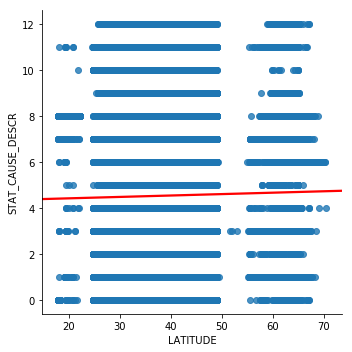

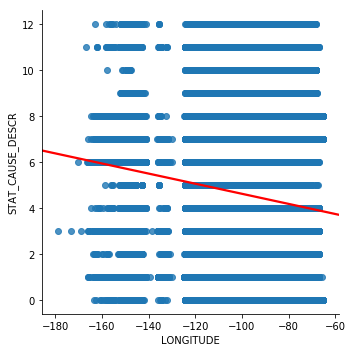

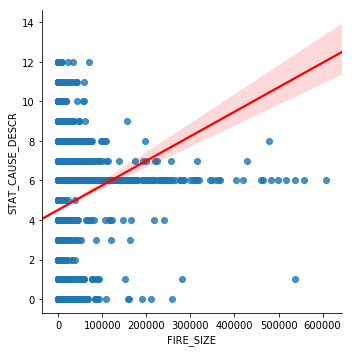

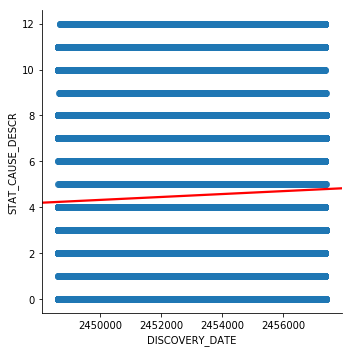

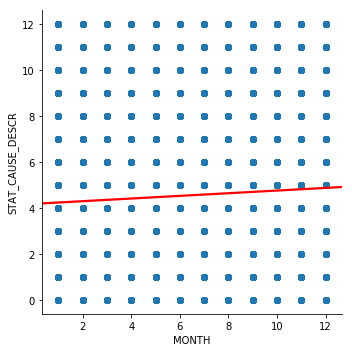

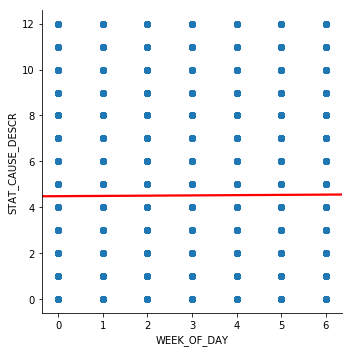

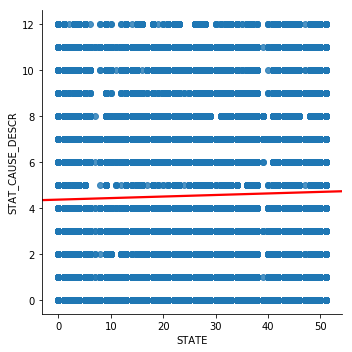

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# For each feature
for feature in features:
    # Plot data and regression model comprised of the current feature and the target
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'})
 
   
plt.tight_layout()
plt.show()

### Get $\alpha$ and $\beta$

In [ ]:
import numpy as np

# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
cm = np.corrcoef(df[features + [target]].T)

######### Get alpha (the feature that has the largest negative correlation with the target)
alpha = features[np.argmin(cm[-1:, :-1])]
######### Get beta (the feature that has the largest positive correlation with the target)
beta = features[np.argmax(cm[-1:, :-1])]

# Print alpha and beta
print('alpha is: ' + alpha)
print('beta: ' + beta)
print(cm)

alpha is: LONGITUDE
beta: MONTH
[[ 1.00000000e+00 -3.54727069e-01  3.88603686e-02  5.82077012e-03
   1.47483938e-01 -3.10987578e-03  1.52474223e-01  1.27289471e-02]
 [-3.54727069e-01  1.00000000e+00 -3.97305482e-02  6.86999225e-03
  -2.43395270e-01 -4.10033300e-03  2.07574877e-01 -1.23878756e-01]
 [ 3.88603686e-02 -3.97305482e-02  1.00000000e+00  7.26001068e-03
   5.69528073e-03 -1.14194024e-05 -8.00253092e-03  1.04498224e-02]
 [ 5.82077012e-03  6.86999225e-03  7.26001068e-03  1.00000000e+00
   2.88131739e-02 -2.09557043e-03  1.00745999e-01  5.24747759e-02]
 [ 1.47483938e-01 -2.43395270e-01  5.69528073e-03  2.88131739e-02
   1.00000000e+00  8.49410445e-03 -3.48042568e-02  5.75825654e-02]
 [-3.10987578e-03 -4.10033300e-03 -1.14194024e-05 -2.09557043e-03
   8.49410445e-03  1.00000000e+00 -2.51845828e-03  7.52276815e-03]
 [ 1.52474223e-01  2.07574877e-01 -8.00253092e-03  1.00745999e-01
  -3.48042568e-02 -2.51845828e-03  1.00000000e+00  3.60041164e-02]
 [ 1.27289471e-02 -1.23878756e-01  1.

### Plot the heat map

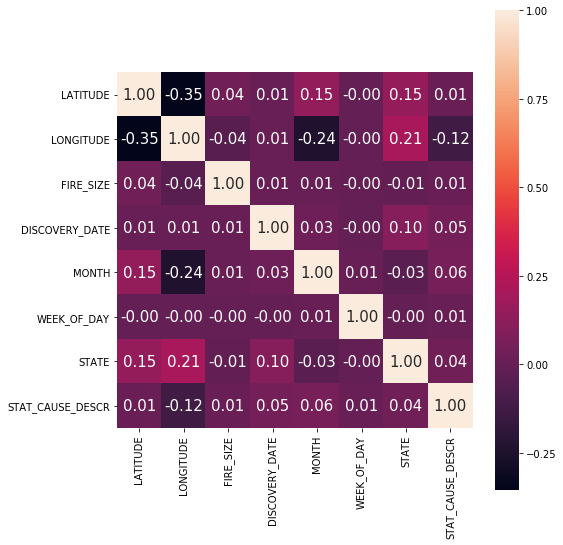

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=features + [target],
                 xticklabels=features + [target])

plt.tight_layout()
plt.show()

### Neural Net Model

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support

In [24]:
# Declare the classifier 
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=200, 
                    activation='relu')

# Fit the model
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred_mlp).sum())

# Print the accuracy
print('The accuracy of neural net:', end=' ')
print(precision_recall_fscore_support(y_pred_mlp, y_test, 
                                      average='micro')[0])

#Misclassified samples: 281926
#The accuracy of neural net: 0.5002552557875705

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Misclassified samples: 279016
The accuracy of neural net: 0.5054135498280569


### Support Vector Model

In [ ]:
#from sklearn.svm import SVC

In [ ]:
# Declare the classifier 
#svm = SVC(class_weight='balanced', random_state=0, probability=True)

# Fit the model
#svm.fit(X_train, y_train)
#y_pred_svm = svm.predict(X_test)

#print('Misclassified samples: %d' % (y_test != y_pred_svm).sum())

# Print the accuracy
#print('The accuracy of SVM is: ' + str(svm.score(X_test, y_test)))

# I had to kill the gradient boost, my low spec laptop couldn't cope with this algorithm and the number of rows. 

I had to kill the Support Vector Model, my low spec laptop couldn't cope with this algorithm and the number of rows.

### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
start = time.time()
sklearn_lr = LogisticRegression()
sklearn_lr.fit(X_train, y_train)
print('Accuracy: ' + str(sklearn_lr.score(X_test, y_test)))
end = time.time()
print('Run time: ' + str(end - start))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.30954550288935373
Run time: 62.561249017715454


### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy: ' + str(dt.score(X_test, y_test)))
end = time.time()
print('Run time: ' + str(end - start))

Accuracy: 0.48800120537455244
Run time: 18.900577068328857


### MLPClassifier

In [34]:
from sklearn.neural_network import MLPClassifier
start = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print('Accuracy: ' + str(mlp.score(X_test, y_test)))
end = time.time()
print('Run time: ' + str(end - start))

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.492212925869465
Run time: 2376.5975630283356


1. MLPClassifier
2. Logistic Regression Model
3. Support Vector Model
    (I had to kill the gradient boost, my low spec laptop couldn't cope with this algorithm and the number of rows.) 
4. Neural Net Model
5. Random Forest Classifier
6. Decision Tree Classifier